## Importando as bibliotecas 

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Criando uma função que treina e retorna o modelo criado

In [2]:
def classificaImagens(file, size_test=0.2):
    lista = os.listdir(file)
    fotos = []
    for c in lista:
        img = cv2.imread(f'{file}/{c}')
        fotos.append(img)
    fotos_redimensionadas = []
    for x in fotos:
        fotos_redimensionadas.append(cv2.resize(x, (30,30)))
    X = np.concatenate((fotos_redimensionadas), axis=0)
    y = [0 for c in range(0,len(fotos_redimensionadas)//2)]
    for c in range(len(fotos_redimensionadas)//2, len(fotos_redimensionadas)):
        y.append(1)
    y = np.array(y)
    y = np.reshape(y, (-1,1))
    X = X.reshape(len(y),-1)
    dados = np.concatenate((X,y), axis=1)
    dados = pd.DataFrame(dados)
    X = dados.iloc[:, :-1].values
    y = dados.iloc[:, -1].values
    from sklearn.model_selection import train_test_split
    Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=size_test)
    from sklearn.svm import SVC
    classificador_lin = SVC(kernel='linear')
    classificador_lin.fit(Xtrain,ytrain)
    return classificador_lin
    y_pred = classificador_lin.predict(Xtest)
    score = classificador_lin.score(X,y)

## Essa função transforma qualquer imagem para ser inserida no modelo

In [3]:
def transformaFoto(file):
    img = cv2.imread(file)
    fotos = []
    fotos.append(img)
    fotos_redimensionadas = []
    for x in fotos:
        fotos_redimensionadas.append(cv2.resize(x, (30,30)))
    X = np.concatenate((fotos_redimensionadas), axis=0)
    X = X.reshape(1,-1)
    return X

## Essa função mostra a imagem junto ao seu rótulo predito

In [4]:
def mostraFoto(file, pred):
    img = cv2.imread(file)
    
    RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    if pred == [0]:
        plt.title('Bulbassauro')
    else:
        plt.title('Pikachu')
        
    plt.axis(False)
    plt.imshow(RGB_im)

## Validando o Modelo com imagens inéditas

In [8]:
#Treinando o Classificador
classificador = classificaImagens('C:/Users/joaovitor/Desktop/Python/pokemons', size_test=0.1)

#Adicionando as fotos inéditas e as transformando para serem validadas
foto = transformaFoto('C:/Users/joaovitor/Desktop/Python/pokemons/pikachu_teste.jpg')
foto2 = transformaFoto('C:/Users/joaovitor/Desktop/Python/pokemons/pikachu_teste2.jpg')
foto3 = transformaFoto('C:/Users/joaovitor/Desktop/Python/pokemons/bulbassauro_teste.jpg')
foto4 = transformaFoto('C:/Users/joaovitor/Desktop/Python/pokemons/bulbassauro_teste2.jpg')

#Classificando
y_pred = classificador.predict(foto)
y_pred2 = classificador.predict(foto2)
y_pred3 = classificador.predict(foto3)
y_pred4 = classificador.predict(foto4)

#Printando o resultado da predição
print(y_pred)
print(y_pred2)
print(y_pred3)
print(y_pred4)

[1]
[1]
[0]
[0]


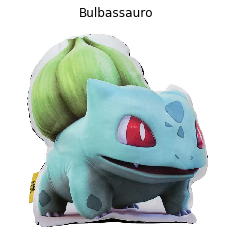

In [7]:
mostraFoto('C:/Users/joaovitor/Desktop/Python/pokemons/bulbassauro_teste.jpg', y_pred3)

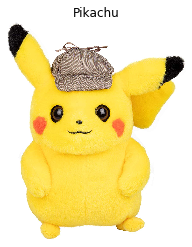

In [10]:
mostraFoto('C:/Users/joaovitor/Desktop/Python/pokemons/pikachu_teste.jpg', y_pred)

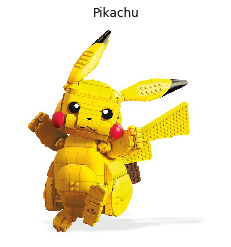

In [11]:
mostraFoto('C:/Users/joaovitor/Desktop/Python/pokemons/pikachu_teste2.jpg', y_pred2)

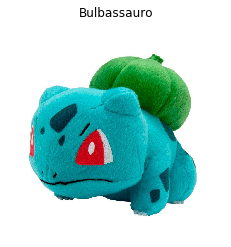

In [9]:
mostraFoto('C:/Users/joaovitor/Desktop/Python/pokemons/bulbassauro_teste2.jpg', y_pred4)